In [1]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

from torch.utils.data import DataLoader, Dataset

In [2]:
LR = 0.001
batch_size = 1024
num_epochs = 30

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=True)

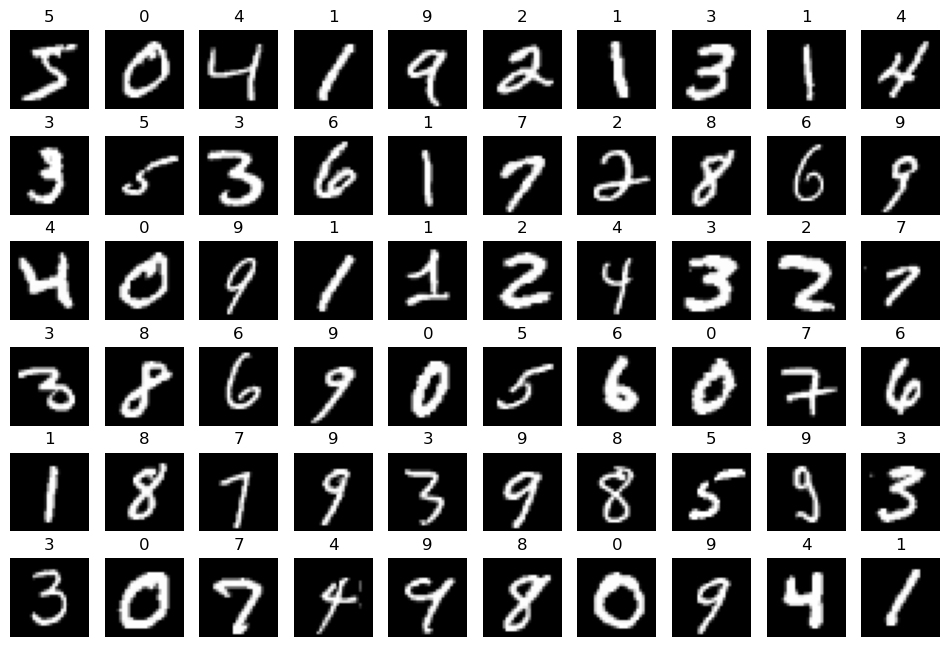

In [4]:
figure = plt.figure(figsize=(12, 8))
rows, cols = 6, 10
for i in range(1, rows * cols + 1):
    # 随机选数据
    # sample_idx = np.random.randint(0, len(X))
    # img, label = X.values[sample_idx].reshape(28, 28), y[sample_idx]
    # 按数据集的顺序选前几个数据
    img, label = trainset[i - 1]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img[0], cmap='gray')

In [5]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

model_1 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], output_size))
optimizer = torch.optim.AdamW(model_1.parameters(), lr=LR, weight_decay=0.1)   # optimize all cnn parameters

In [6]:
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

In [7]:
%%time
# Traning the Model
#history-like list for store loss & acc value
for epoch in range(num_epochs):
    #training model & store loss & acc / epoch
    correct_train = 0
    total_train = 0
    for i, (images, labels) in enumerate(train_loader):
        # 1.Define variables
        train = images.view(-1, input_size)
        labels = labels
        # 2.Clear gradients
        optimizer.zero_grad()
        # 3.Forward propagation
        outputs = model_1(train)
        # 4.Calculate softmax and cross entropy loss
        train_loss = loss_func(outputs, labels)
        # 5.Calculate gradients
        train_loss.backward()
        # 6.Update parameters
        optimizer.step()
        # 7.Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]
        # 8.Total number of labels
        total_train += len(labels)
        # 9.Total correct predictions
        correct_train += (predicted == labels).float().sum()
    #10.store val_acc / epoch
    train_accuracy = 100 * correct_train / float(total_train)
    training_accuracy.append(train_accuracy)
    # 11.store loss / epoch
    training_loss.append(train_loss.data)

    #evaluate model & store loss & acc / epoch
    correct_test = 0
    total_test = 0
    for images, labels in test_loader:
        # 1.Define variables
        test = images.view(-1, input_size)
        # 2.Forward propagation
        outputs = model_1(test)
        # 3.Calculate softmax and cross entropy loss
        val_loss = loss_func(outputs, labels)
        # 4.Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]
        # 5.Total number of labels
        total_test += len(labels)
        # 6.Total correct predictions
        correct_test += (predicted == labels).float().sum()
    #6.store val_acc / epoch
    val_accuracy = 100 * correct_test / float(total_test)
    validation_accuracy.append(val_accuracy)
    # 11.store val_loss / epoch
    validation_loss.append(val_loss.data)
    print('Train Epoch: {}/{} Traing_Loss: {} Traing_acc: {:.6f}% Val_Loss: {} Val_accuracy: {:.6f}%'
        .format(epoch+1, num_epochs, train_loss.data, train_accuracy, val_loss.data, val_accuracy))

Train Epoch: 1/30 Traing_Loss: 0.3398120105266571 Traing_acc: 81.753334% Val_Loss: 0.35666540265083313 Val_accuracy: 90.610001%
Train Epoch: 2/30 Traing_Loss: 0.37861913442611694 Traing_acc: 90.876663% Val_Loss: 0.26316335797309875 Val_accuracy: 92.400002%
Train Epoch: 3/30 Traing_Loss: 0.20812368392944336 Traing_acc: 92.346664% Val_Loss: 0.15567615628242493 Val_accuracy: 93.389999%
Train Epoch: 4/30 Traing_Loss: 0.2560539245605469 Traing_acc: 93.820000% Val_Loss: 0.1801917850971222 Val_accuracy: 94.550003%
Train Epoch: 5/30 Traing_Loss: 0.15960262715816498 Traing_acc: 94.699997% Val_Loss: 0.16522559523582458 Val_accuracy: 94.889999%
Train Epoch: 6/30 Traing_Loss: 0.12259679287672043 Traing_acc: 95.428337% Val_Loss: 0.13578028976917267 Val_accuracy: 95.580002%
Train Epoch: 7/30 Traing_Loss: 0.1327255219221115 Traing_acc: 95.896667% Val_Loss: 0.11584658920764923 Val_accuracy: 95.750000%
Train Epoch: 8/30 Traing_Loss: 0.1401127278804779 Traing_acc: 96.283333% Val_Loss: 0.1370704025030136

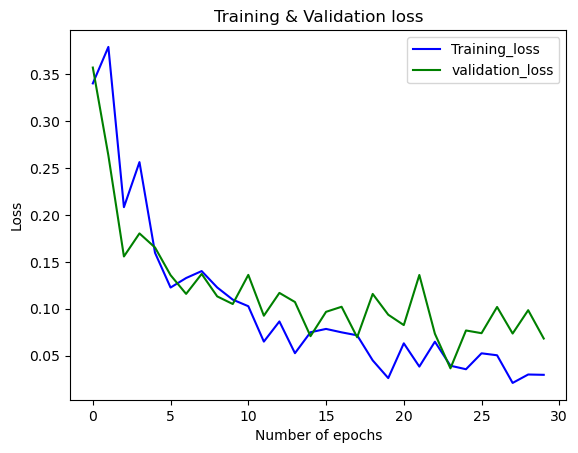

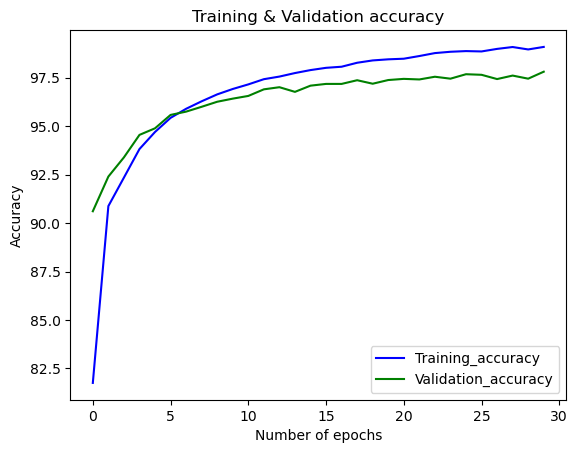

In [8]:
# visualization
plt.plot(range(num_epochs), training_loss, 'b-', label='Training_loss')
plt.plot(range(num_epochs), validation_loss, 'g-', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(num_epochs), training_accuracy, 'b-', label='Training_accuracy')
plt.plot(range(num_epochs), validation_accuracy, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

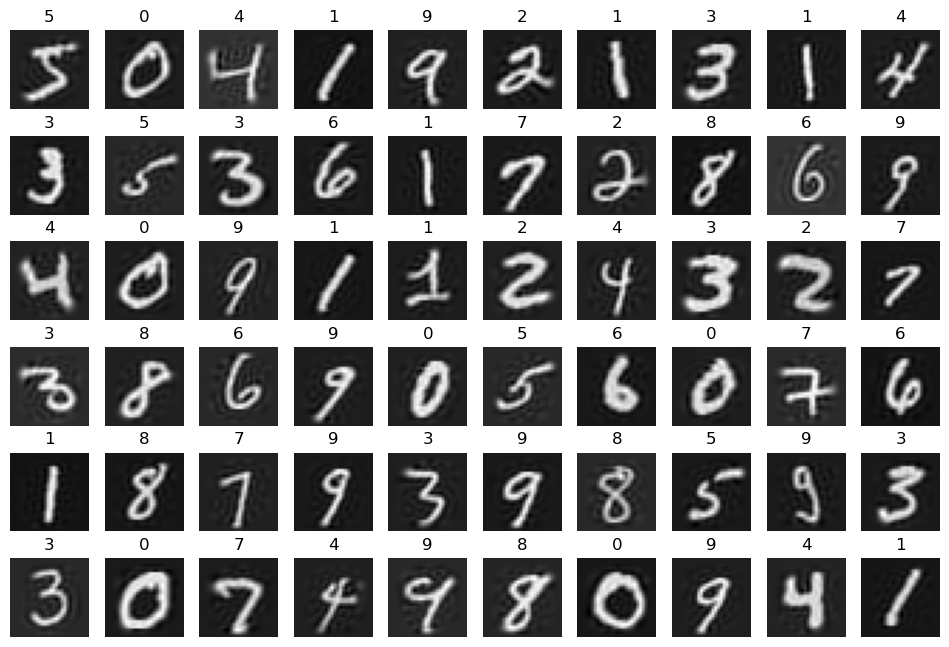

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=154) 
#pca = PCA(n_components=0.95) # 保留95%的方差，结果也是154个特征
X_reduced = pca.fit_transform(trainset.data.numpy().reshape(60000, 28*28))	# 压缩
# X_reduced.shape = (60000, 154)
X_recovered = pca.inverse_transform(X_reduced).reshape(60000, 28, 28)

figure = plt.figure(figsize=(12, 8))
rows, cols = 6, 10
for i in range(1, rows * cols + 1):
    # 随机选数据
    # sample_idx = np.random.randint(0, len(X))
    # img, label = X.values[sample_idx].reshape(28, 28), y[sample_idx]
    # 按数据集的顺序选前几个数据
    img, label = X_recovered[i - 1], trainset.targets[i-1].numpy()
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [10]:
class PCA_dataset(Dataset):
    def __init__(self, data, label):
        self.data = torch.Tensor(data)
        self.label = label

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)
    
pca_train_dataset = PCA_dataset(X_reduced, trainset.targets)
pca_test_dataset = PCA_dataset(pca.transform(testset.data.numpy().reshape(len(testset), 28*28)), testset.targets)
pca_train_loader = DataLoader(pca_train_dataset, batch_size=batch_size, shuffle=True)
pca_test_loader = DataLoader(pca_test_dataset, batch_size=batch_size, shuffle=True)

In [11]:
input_size = X_reduced.shape[1]
hidden_sizes = [128, 64]
output_size = 10

loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted

model_2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], output_size))
optimizer = torch.optim.AdamW(model_2.parameters(), lr=LR, weight_decay=1)   # optimize all cnn parameters

In [12]:
training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []

In [13]:
%%time
# Traning the Model
#history-like list for store loss & acc value
for epoch in range(num_epochs):
    #training model & store loss & acc / epoch
    correct_train = 0
    total_train = 0
    for i, (images, labels) in enumerate(pca_train_loader):
        # 1.Define variables
        train = images
        labels = labels
        # 2.Clear gradients
        optimizer.zero_grad()
        # 3.Forward propagation
        outputs = model_2(train)
        # 4.Calculate softmax and cross entropy loss
        train_loss = loss_func(outputs, labels)
        # 5.Calculate gradients
        train_loss.backward()
        # 6.Update parameters
        optimizer.step()
        # 7.Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]
        # 8.Total number of labels
        total_train += len(labels)
        # 9.Total correct predictions
        correct_train += (predicted == labels).float().sum()
    #10.store val_acc / epoch
    train_accuracy = 100 * correct_train / float(total_train)
    training_accuracy.append(train_accuracy)
    # 11.store loss / epoch
    training_loss.append(train_loss.data)

    #evaluate model & store loss & acc / epoch
    correct_test = 0
    total_test = 0
    for images, labels in pca_test_loader:
        # 1.Define variables
        test = images
        # 2.Forward propagation
        outputs = model_2(test)
        # 3.Calculate softmax and cross entropy loss
        val_loss = loss_func(outputs, labels)
        # 4.Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]
        # 5.Total number of labels
        total_test += len(labels)
        # 6.Total correct predictions
        correct_test += (predicted == labels).float().sum()
    #6.store val_acc / epoch
    val_accuracy = 100 * correct_test / float(total_test)
    validation_accuracy.append(val_accuracy)
    # 11.store val_loss / epoch
    validation_loss.append(val_loss.data)
    print('Train Epoch: {}/{} Traing_Loss: {} Traing_acc: {:.6f}% Val_Loss: {} Val_accuracy: {:.6f}%'
        .format(epoch+1, num_epochs, train_loss.data, train_accuracy, val_loss.data, val_accuracy))

Train Epoch: 1/30 Traing_Loss: 0.28369542956352234 Traing_acc: 81.788330% Val_Loss: 0.2523058354854584 Val_accuracy: 92.129997%
Train Epoch: 2/30 Traing_Loss: 0.15763257443904877 Traing_acc: 94.316666% Val_Loss: 0.20432840287685394 Val_accuracy: 94.769997%
Train Epoch: 3/30 Traing_Loss: 0.11416231095790863 Traing_acc: 96.315002% Val_Loss: 0.14714011549949646 Val_accuracy: 95.629997%
Train Epoch: 4/30 Traing_Loss: 0.11530040949583054 Traing_acc: 97.203331% Val_Loss: 0.13029280304908752 Val_accuracy: 96.309998%
Train Epoch: 5/30 Traing_Loss: 0.12146330624818802 Traing_acc: 97.633331% Val_Loss: 0.09700842946767807 Val_accuracy: 96.620003%
Train Epoch: 6/30 Traing_Loss: 0.09317554533481598 Traing_acc: 97.986664% Val_Loss: 0.10060492902994156 Val_accuracy: 96.919998%
Train Epoch: 7/30 Traing_Loss: 0.06889593601226807 Traing_acc: 98.235001% Val_Loss: 0.11323147267103195 Val_accuracy: 97.199997%
Train Epoch: 8/30 Traing_Loss: 0.0648626983165741 Traing_acc: 98.441666% Val_Loss: 0.0788458958268

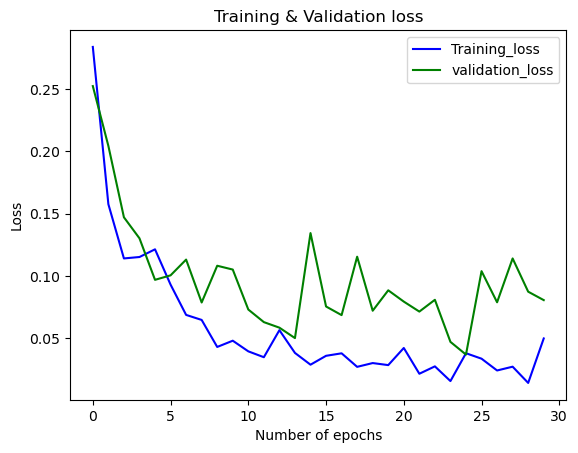

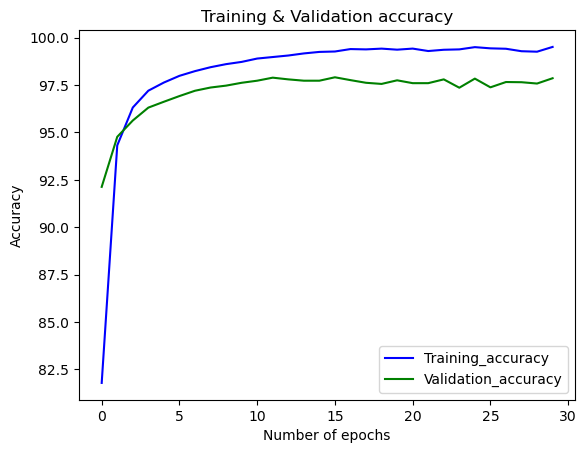

In [14]:
# visualization
plt.plot(range(num_epochs), training_loss, 'b-', label='Training_loss')
plt.plot(range(num_epochs), validation_loss, 'g-', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(num_epochs), training_accuracy, 'b-', label='Training_accuracy')
plt.plot(range(num_epochs), validation_accuracy, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
pca = PCA(n_components=200) 
X_reduced = pca.fit_transform(trainset.data.numpy().reshape(60000, 28*28))
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

# Print results
print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")


Explained Variance Ratio:
[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715818 0.01692111 0.01578641 0.01482953 0.01324561 0.01276897
 0.01187263 0.01152684 0.01066166 0.01006713 0.00953573 0.00912544
 0.00883405 0.00839319 0.00812579 0.00786366 0.00744733 0.00690859
 0.00658094 0.00648148 0.00602615 0.00586582 0.00570021 0.00543628
 0.00505786 0.00487859 0.00481429 0.00472266 0.00456747 0.00444836
 0.00418501 0.00398215 0.00384975 0.00375103 0.00362009 0.00351591
 0.00340058 0.00321874 0.00319017 0.00312805 0.00295983 0.00288955
 0.0028413  0.00271436 0.00269521 0.00258473 0.00253771 0.00244781
 0.00240506 0.00239263 0.00230408 0.00221532 0.00213721 0.00207225
 0.00203043 0.00196783 0.00192853 0.00188632 0.00186977 0.00181083
 0.00177562 0.00174898 0.00165758 0.00163894 0.00161462 0.00155116
 0.00147613 0.00143176 0.00142094 0.00141153 0.00140174 0.00135736
 0.00133847 0.00132396 0.00130157 0

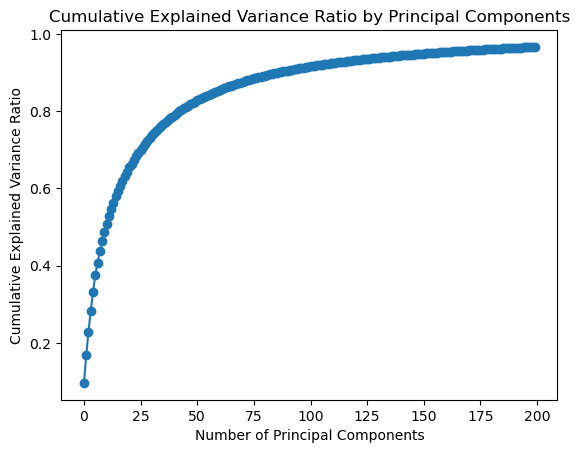

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Plot explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()